In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv("zomato.csv", encoding = 'latin-1')
df.head

<bound method NDFrame.head of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul  

In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# data analysis
1.Missing values
2. explore about numerical variables
3.explore about categorical variables
4. finding realtionship between features

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
#here the cuisines having 9 missing values
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

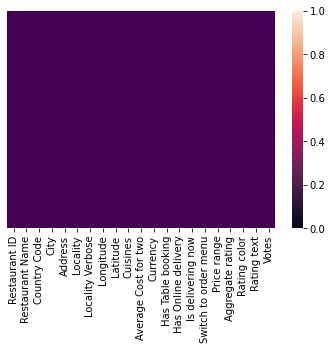

In [17]:
#heat map
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False)
sns.heatmap(df.isnull(), yticklabels=False,cbar= False, cmap='viridis')

In [19]:
df.shape

(9551, 21)

In [24]:
!pip install openpyxl


     -------------------------------------- 242.1/242.1 KB 2.5 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\vishwanth\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [34]:
final=pd.merge(df, df_country, on='Country Code', how='left')

In [35]:
final

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [37]:
final.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [36]:
# to check data types
final.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

# on is actually used for on which column you actually gonnna combine
left , right joint on specific coulmn

In [39]:
final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [43]:
#how many countries are there, w.r.t countries how many records are there?
country_names = final.Country.value_counts().index

In [48]:
country_values = Country_names.values

([<matplotlib.patches.Wedge at 0x28cf168e380>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

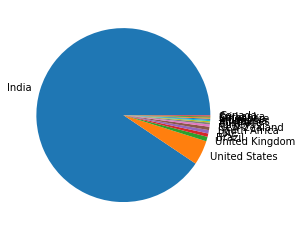

In [50]:
#creating some pychart
import matplotlib.pyplot as plt
plt.pie(country_values, labels= country_names)

([<matplotlib.patches.Wedge at 0x28cf16f4f70>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

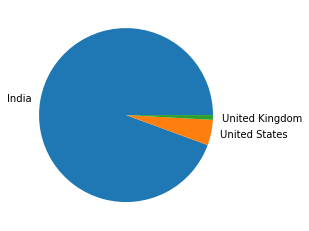

In [53]:
#pie chart- top 3 countries that uses zomato
plt.pie(country_values[:3], labels = country_names[:3])

([<matplotlib.patches.Wedge at 0x28cf1714100>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.392%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.735%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.873%')])

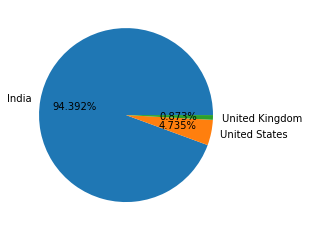

In [56]:
# 'autopct' is used for indicating percentage
plt.pie(country_values[:3],labels= country_names[:3], autopct= '%2.3f%%')

# observation: zomato maximun records or transcation are from india
    After that USA and then UK

In [57]:
## numerical variables


In [58]:
final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [61]:
final.groupby(['Aggregate rating','Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [63]:
# converting above in to dataframe
final.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [65]:
ratings = final.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns = {0:'Rating Count'})

In [66]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Observations

1.when ratings is between 4.5 to 4.9 it indicates Excellent

2. when the ratings are between 4.0 to 4.4 indicates very good

3.when rating is between 3.5 to 3.9 indicates good

4.when rating is between 3.0 to 3.4 indicates average

5.when the rating is between 2.5 to 2.9 indicates average

6.when the rating is between 2.0 to 2.4 indicates poor

In [67]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

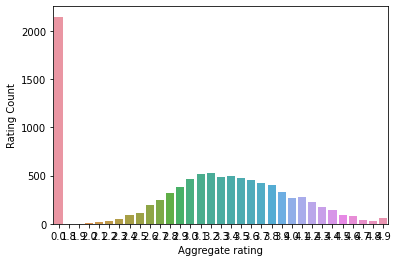

In [69]:
sns.barplot(x="Aggregate rating", y= "Rating Count", data= ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

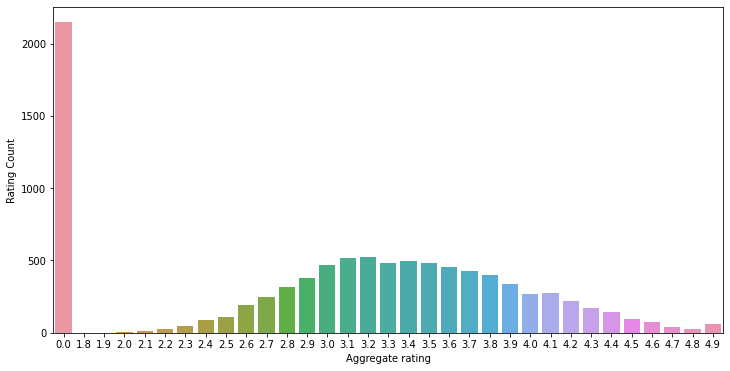

In [72]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='Aggregate rating', y='Rating Count', data= ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

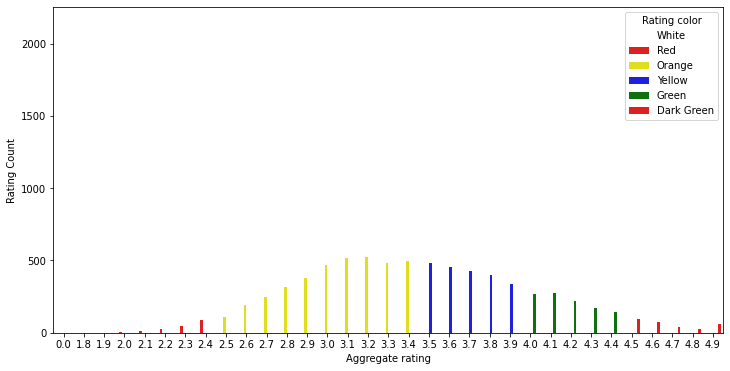

In [77]:
sns.barplot(x='Aggregate rating', y='Rating Count', hue='Rating color', data= ratings, palette=['white','red','yellow','blue','green','red'])

Observation:

    1. Not rated count is very high
    
    2.Maximum number of rating are betwen 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

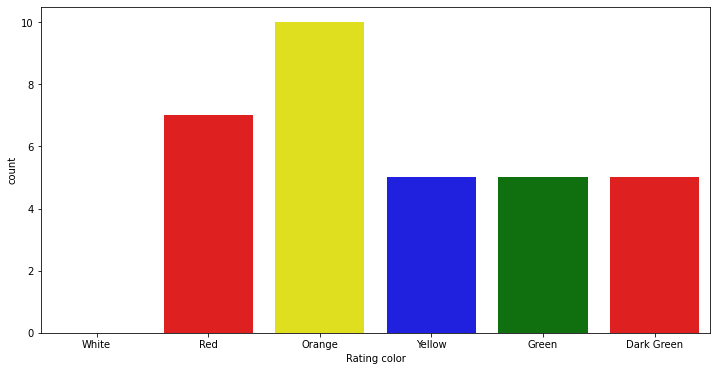

In [78]:
#count plot
sns.countplot(x='Rating color', data= ratings, palette=['white','red','yellow','blue','green','red'])

In [79]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [97]:
## find the countries name that has given 0 rating
f= final[final['Rating color'] == 'White'].groupby('Country').size().reset_index()
f

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Obsevations
Maximum number of 0 ratings are from india

In [100]:
# find out which currency is used by which country
final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [104]:
final[['Country', 'Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [105]:
#which countries do have online deliveries?

final[['Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [106]:
final[final['Has Online delivery'] == 'Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

Observations: 
    1.Online Deliveries are available in India and UAE
    
    

In [109]:
#Create the pie chart for cities distribution



In [110]:
final.City.value_counts().values

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

In [112]:
final.Country.value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x28cf7da9060>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

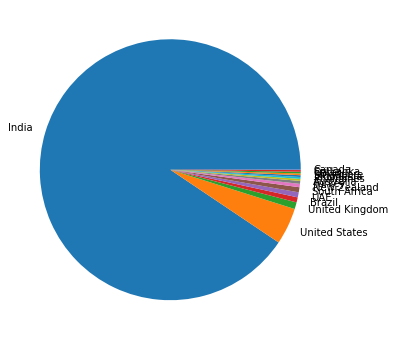

In [115]:
plt.pie(final.Country.value_counts().values,labels=final.Country.value_counts().index)

In [118]:
city_values = final.City.value_counts().values
city_labels= final.City.value_counts().index

([<matplotlib.patches.Wedge at 0x28cf7ef2680>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

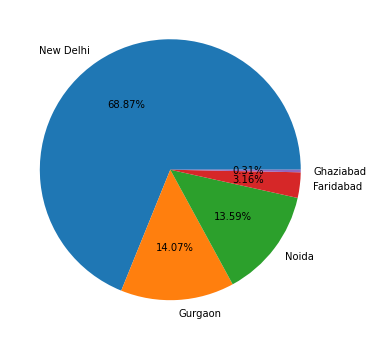

In [121]:
#for top 5 city distribution
plt.pie(city_values[:5], labels= city_labels[:5], autopct="%1.2f%%")

# findin g the top ten cuisines


In [129]:
final.Cuisines

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [132]:
final.Cuisines

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [128]:
final

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


# finding out the top 10 cuisines can be determined by ratings .like how many rating are for those dishes

In [142]:
final[final['Cuisines']== 'Indian'].groupby('Aggregate rating').size().reset_index()

,Aggregate rating,0
0,3.1,1
1,3.4,1
2,3.9,1
3,4.0,1
4,4.1,2
5,4.2,2
6,4.3,3
7,4.4,2
8,4.6,1
9,4.7,2


In [140]:
Cuisines_values = Cuisines_names.values